# Libraries

In [3]:
import sys
import sklearn
%matplotlib inline
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import numpy as np
from sklearn.datasets import make_s_curve, make_swiss_roll
from sklearn.manifold import Isomap, SpectralEmbedding, LocallyLinearEmbedding
import matplotlib.pyplot as plt

# Version

In [4]:
print("Python version")
print(sys.version)
print("Python Version info.")
print(sys.version_info)
print('sklearn: {}'.format(sklearn.__version__))

Python version
3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
Python Version info.
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)
sklearn: 1.0.2


# Dataset

In [5]:
circle_csv = pd.read_csv("data/circles0.3.csv")
spiral_csv = pd.read_csv("data/spiral1.csv")
moons_csv = pd.read_csv("data/moons1.csv")
halfkernel_csv = pd.read_csv("data/halfkernel.csv")

X_circle = circle_csv[['x1', 'x2']].values
y_circle = circle_csv['label'].values

X_spiral = spiral_csv[['x', 'y']].values
y_spiral = spiral_csv['label'].values

X_moons = moons_csv[['x1', 'x2']].values
y_moons = moons_csv['label'].values

X_halfkernel = halfkernel_csv[['x1', 'x2']].values
y_halfkernel = halfkernel_csv['label'].values

In [6]:
circle_csv_0 = circle_csv[(circle_csv['label'] == 0)]
circle_csv_1 = circle_csv[(circle_csv['label'] == 1)]
cdf_circle_0 = circle_csv_0[['x1', 'x2']]
cdf_circle_1 = circle_csv_1[['x1', 'x2']]

spiral_csv_0 = spiral_csv[(spiral_csv['label'] == 0)]
spiral_csv_1 = spiral_csv[(spiral_csv['label'] == 1)]
cdf_spiral_0 = spiral_csv_0[['x', 'y']]
cdf_spiral_1 = spiral_csv_1[['x', 'y']]

moons_csv_0 = moons_csv[(moons_csv['label'] == 0)]
moons_csv_1 = moons_csv[(moons_csv['label'] == 1)]
moons_cdf_0 = moons_csv_0[['x1', 'x2']]
moons_cdf_1 = moons_csv_1[['x1', 'x2']]

halfkernel_csv_0 = halfkernel_csv[(halfkernel_csv['label'] == 0)]
halfkernel_csv_1 = halfkernel_csv[(halfkernel_csv['label'] == 1)]
halfkernel_cdf_0 = halfkernel_csv_0[['x1', 'x2']]
halfkernel_cdf_1 = halfkernel_csv_1[['x1', 'x2']]

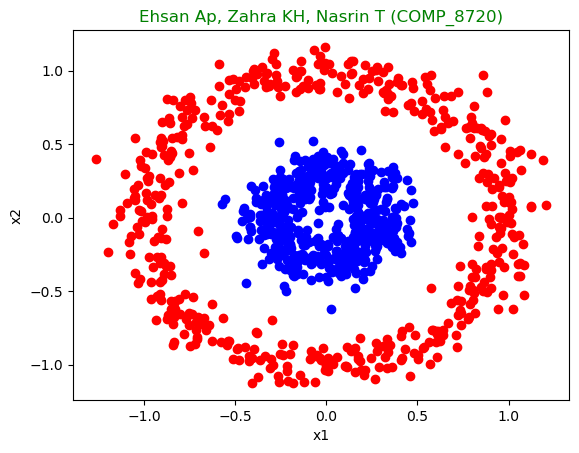

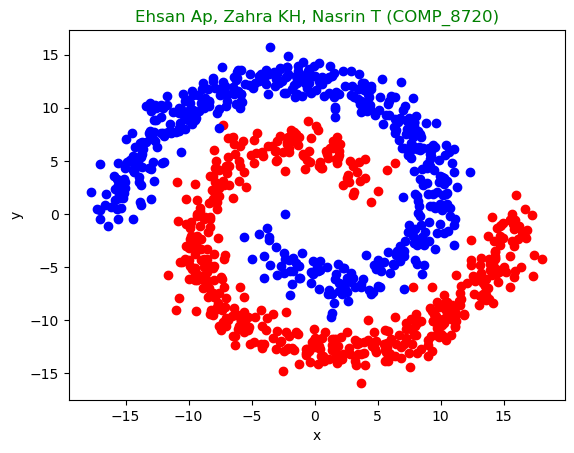

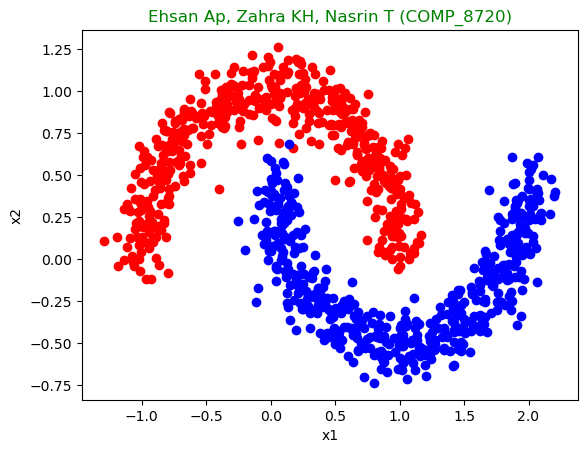

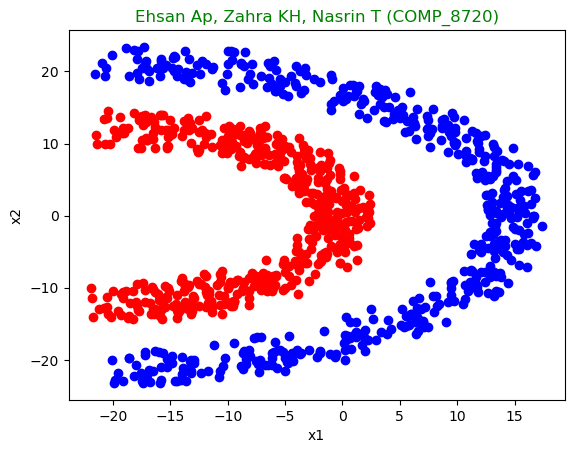

In [7]:
plt.scatter(cdf_circle_0.x1, cdf_circle_0.x2, color='red')
plt.scatter(cdf_circle_1.x1, cdf_circle_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(cdf_spiral_0.x, cdf_spiral_0.y, color='red')
plt.scatter(cdf_spiral_1.x, cdf_spiral_1.y, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(moons_csv_0.x1, moons_csv_0.x2, color='red')
plt.scatter(moons_csv_1.x1, moons_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(halfkernel_csv_0.x1, halfkernel_csv_0.x2, color='red')
plt.scatter(halfkernel_csv_1.x1, halfkernel_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

In [9]:
def calculate_xb_index(X, y, wcss):
    n_samples, n_features = X.shape
    centers = np.zeros((n_clusters, n_features))
    for i in range(n_clusters):
        centers[i] = np.mean(X[y == i], axis=0)
    d = np.sqrt(np.sum((X - centers[y]) ** 2, axis=1))
    return np.sum((d ** 2) / (n_samples * wcss))


def calculate_wcss(X, y):
    wcss = 0
    for k in np.unique(y):
        mask = y == k
        centroid = np.mean(X[mask], axis=0)
        distance = np.sum((X[mask] - centroid) ** 2)
        wcss += distance
    return wcss


def calculate_i_index(X, y):
    wcss = calculate_wcss(X, y)
    n_samples, n_features = X.shape
    n_clusters = len(np.unique(y))
    s = 1 - silhouette_score(X, y)
    if n_clusters > 1:
        return s * np.sqrt(wcss / (n_samples * (n_clusters - 1)))
    else:
        return np.nan

# Circle

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

# Load the dataset
data = circle_csv
X = data[['x1', 'x2']].values
y = data['label'].values

# Define the grid search parameters
param_grid = {
    'gamma': np.arange(1, 51),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']
}

# Perform grid search with KPCA and reconstruction error calculation
results = []

for kernel in param_grid['kernel']:
    for gamma in param_grid['gamma']:
        kpca = KernelPCA(n_components=2, kernel=kernel, gamma=gamma, fit_inverse_transform=True)
        X_kpca = kpca.fit_transform(X)
        X_reconstructed = kpca.inverse_transform(X_kpca)
        reconstruction_error = mean_squared_error(X, X_reconstructed)
        results.append((kernel, gamma, reconstruction_error))

# Sort the results by reconstruction error
sorted_results = sorted(results, key=lambda x: x[2])

# Display the best and worst parameters in a table
headers = ['Kernel', 'Gamma', 'Reconstruction Error']
print("Best Parameters:")
print(tabulate([sorted_results[0]], headers=headers))
print("\nWorst Parameters:")
print(tabulate([sorted_results[-1]], headers=headers))


NameError: name 'circle_csv' is not defined

In [1]:
circle_csv = circle_csv

X = circle_csv[['x1', 'x2']]
y = circle_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='bwr')
plt.title('Original dataset [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr')
plt.title('PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='bwr')
plt.title('Kernel PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

NameError: name 'circle_csv' is not defined

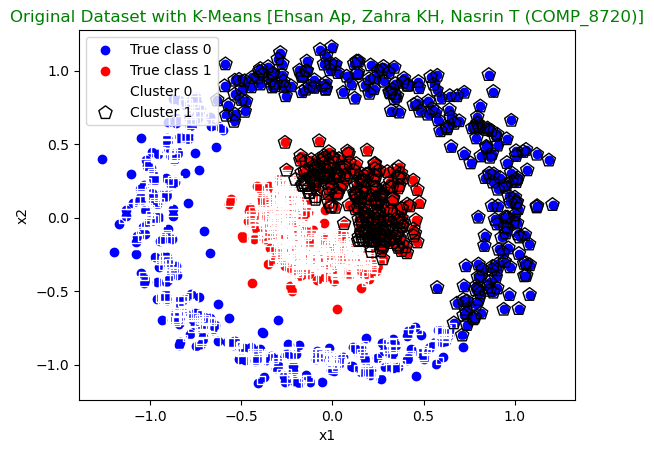

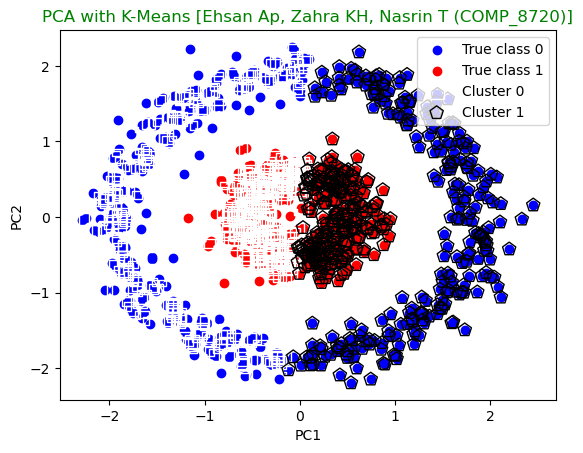

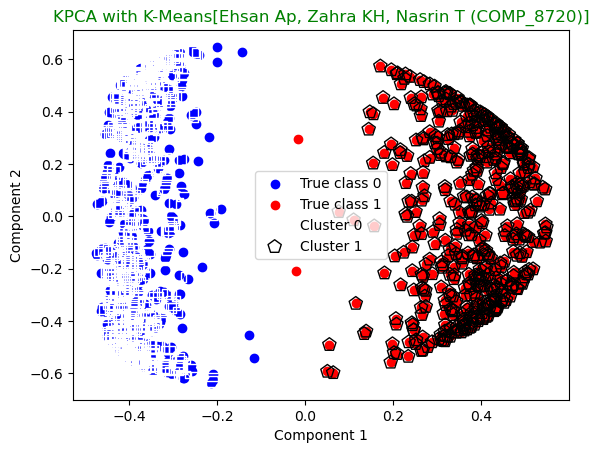

In [11]:
circle_csv = circle_csv

X = circle_csv[['x1', 'x2']]
y_true = circle_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Original Dataset with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(X_pca)

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_pca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_pca.labels_ == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.title("PCA with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_kpca = KMeans(n_clusters=2, random_state=0)
kmeans_kpca.fit(X_kpca)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_kpca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_kpca.labels_ == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
plt.title("KPCA with K-Means[ Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

In [92]:
data = circle_csv

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_pca.fit(X_pca)
y_pred_pca = kmeans_pca.predict(X_pca)

kmeans_kpca = KMeans(n_clusters=2, random_state=42)
kmeans_kpca.fit(X_kpca)
y_pred_kpca = kmeans_kpca.predict(X_kpca)

db_score_pca = davies_bouldin_score(X_pca, y_pred_pca)
db_score_kpca = davies_bouldin_score(X_kpca, y_pred_kpca)
ch_score_pca = calinski_harabasz_score(X_pca, y_pred_pca)
ch_score_kpca = calinski_harabasz_score(X_kpca, y_pred_kpca)
silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)
ari_pca = adjusted_rand_score(y, y_pred_pca)
ari_kpca = adjusted_rand_score(y, y_pred_kpca)

n_clusters = 3
wcss_pca = kmeans_pca.inertia_
wcss_kpca = kmeans_kpca.inertia_

xb_score_pca = calculate_xb_index(X_pca, y_pred_pca, wcss_pca)
xb_score_kpca = calculate_xb_index(X_kpca, y_pred_kpca, wcss_kpca)
i_score_pca = calculate_i_index(X_pca, y_pred_pca)
i_score_kpca = calculate_i_index(X_kpca, y_pred_kpca)

scores = pd.DataFrame({
    'Metric': ['Davies-Bouldin', 'Calinski-Harabasz', 'Silhouette', 'Adjusted Rand Index', 'Xie-Beni Index', 'Index I'],
    'PCA': [db_score_pca, ch_score_pca, silhouette_pca, ari_pca, xb_score_pca, i_score_pca],
    'Kernel PCA': [db_score_kpca, ch_score_kpca, silhouette_kpca, ari_kpca, xb_score_kpca, i_score_kpca]
})
print(scores)

                Metric         PCA   Kernel PCA
0       Davies-Bouldin    1.309682     0.885971
1    Calinski-Harabasz  461.343708  1033.502329
2           Silhouette    0.290228     0.514921
3  Adjusted Rand Index   -0.001002     0.992008
4       Xie-Beni Index    0.001000     0.001000
5              Index I    0.830081     0.176207


/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


# Moons

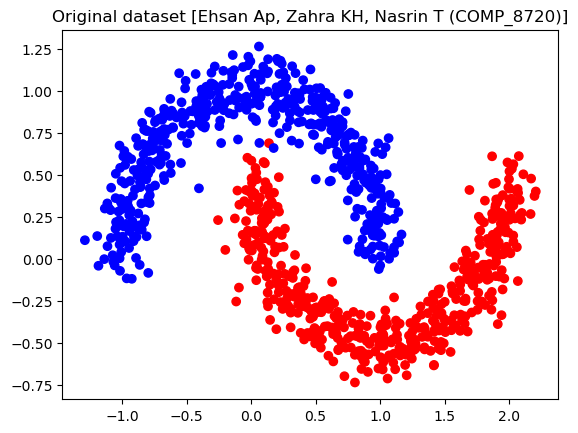

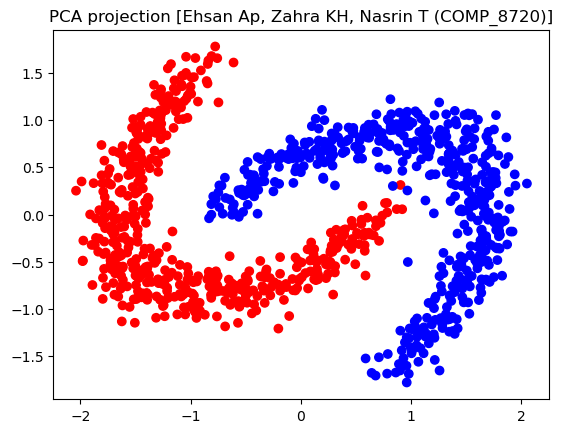

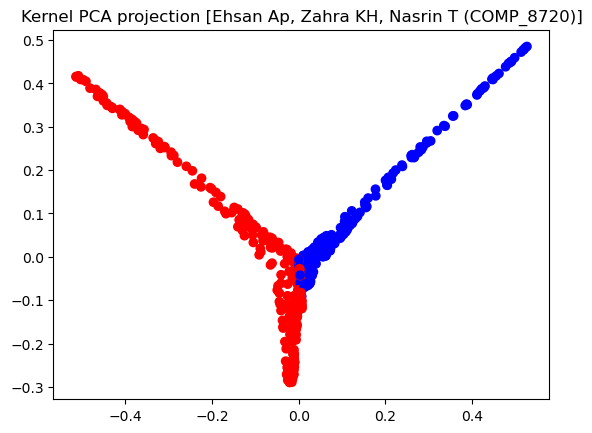

In [108]:
X = moons_csv[['x1', 'x2']]
y = moons_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='bwr')
plt.title('Original dataset [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr')
plt.title('PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=40)
X_kpca = kpca.fit_transform(X_std)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='bwr')
plt.title('Kernel PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

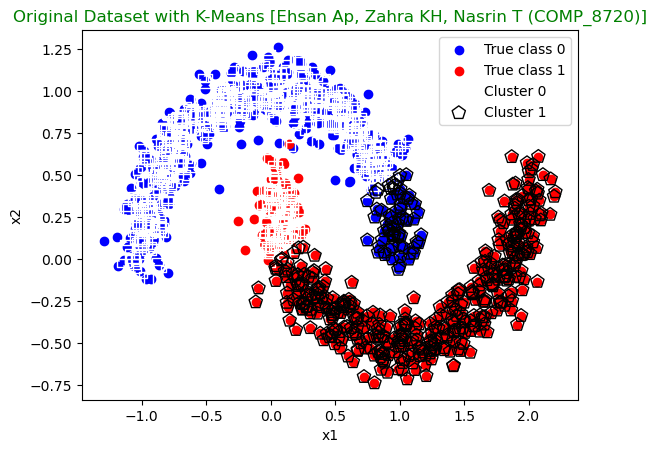

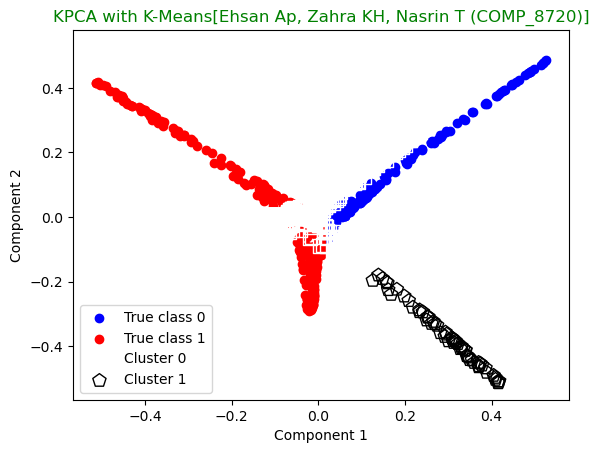

In [107]:
moons_csv = moons_csv

X = moons_csv[['x1', 'x2']]
y_true = moons_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Original Dataset with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf',gamma=40)
X_kpca = kpca.fit_transform(X_std)

kmeans_kpca = KMeans(n_clusters=2, random_state=40)
kmeans_kpca.fit(X_kpca)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_kpca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_kpca.labels_ == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
plt.title("KPCA with K-Means[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

In [105]:
data = moons_csv

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kpca = KernelPCA(n_components=2, kernel='rbf', degree=2,gamma=40)
X_kpca = kpca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_pca.fit(X_pca)
y_pred_pca = kmeans_pca.predict(X_pca)

kmeans_kpca = KMeans(n_clusters=2, random_state=30)
kmeans_kpca.fit(X_kpca)
y_pred_kpca = kmeans_kpca.predict(X_kpca)

db_score_pca = davies_bouldin_score(X_pca, y_pred_pca)
db_score_kpca = davies_bouldin_score(X_kpca, y_pred_kpca)
ch_score_pca = calinski_harabasz_score(X_pca, y_pred_pca)
ch_score_kpca = calinski_harabasz_score(X_kpca, y_pred_kpca)
silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)
ari_pca = adjusted_rand_score(y, y_pred_pca)
ari_kpca = adjusted_rand_score(y, y_pred_kpca)

n_clusters = 2
wcss_pca = kmeans_pca.inertia_
wcss_kpca = kmeans_kpca.inertia_

xb_score_pca = calculate_xb_index(X_pca, y_pred_pca, wcss_pca)
xb_score_kpca = calculate_xb_index(X_kpca, y_pred_kpca, wcss_kpca)
i_score_pca = calculate_i_index(X_pca, y_pred_pca)
i_score_kpca = calculate_i_index(X_kpca, y_pred_kpca)

scores = pd.DataFrame({
    'Metric': ['Davies-Bouldin', 'Calinski-Harabasz', 'Silhouette', 'Adjusted Rand Index', 'Xie-Beni Index', 'Index I'],
    'PCA': [db_score_pca, ch_score_pca, silhouette_pca, ari_pca, xb_score_pca, i_score_pca],
    'Kernel PCA': [db_score_kpca, ch_score_kpca, silhouette_kpca, ari_kpca, xb_score_kpca, i_score_kpca]
})
print(scores)

                Metric          PCA  Kernel PCA
0       Davies-Bouldin     0.816856    0.362532
1    Calinski-Harabasz  1346.593923  714.992649
2           Silhouette     0.488802    0.765526
3  Adjusted Rand Index     0.486690    0.014177
4       Xie-Beni Index     0.001000    0.001000
5              Index I     0.471668    0.033358


In [69]:
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score, adjusted_rand_score

# Assuming 'moons_csv' is a DataFrame containing your data
data = moons_csv

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Define search space
gammas = np.linspace(1, 100, 40)
kernel = 'rbf'
degrees = [2, 3, 4, 5]

best_ari = -1
best_params = None
best_kpca = None
best_kmeans_kpca = None
best_n_clusters = None

# Grid search
for gamma in gammas:
    for degree in degrees:
        kpca = KernelPCA(n_components=2, kernel=kernel, gamma=gamma, degree=degree)
        X_kpca = kpca.fit_transform(X_std)

        kmeans_kpca = KMeans(n_clusters=2, random_state=0)
        kmeans_kpca.fit(X_kpca)
        y_pred_kpca = kmeans_kpca.predict(X_kpca)

        ari_kpca = adjusted_rand_score(y, y_pred_kpca)

        if ari_kpca > best_ari:
            best_ari = ari_kpca
            best_params = {'kernel': kernel, 'gamma': gamma, 'degree': degree, 'n_components': 2}
            best_kpca = kpca
            best_kmeans_kpca = kmeans_kpca
            best_n_clusters = 2

# Use the best Kernel PCA and KMeans
X_kpca_best = best_kpca.fit_transform(X_std)
y_pred_kpca_best = best_kmeans_kpca.predict(X_kpca_best)

db_score_kpca_best = davies_bouldin_score(X_kpca_best, y_pred_kpca_best)
ch_score_kpca_best = calinski_harabasz_score(X_kpca_best, y_pred_kpca_best)
silhouette_kpca_best = silhouette_score(X_kpca_best, y_pred_kpca_best)
ari_kpca_best = adjusted_rand_score(y, y_pred_kpca_best)

print(f"Best number of clusters: {best_n_clusters}")
print(f"Best Kernel PCA parameters: {best_params}")
print(f"Best ARI score: {ari_kpca_best}")

# You can also compute the Xie-Beni Index and Index I using the best_kpca and best_kmeans_kpca objects if needed.

Best number of clusters: 2
Best Kernel PCA parameters: {'kernel': 'rbf', 'gamma': 1.0, 'degree': 2, 'n_components': 2}
Best ARI score: 0.5501138093818896


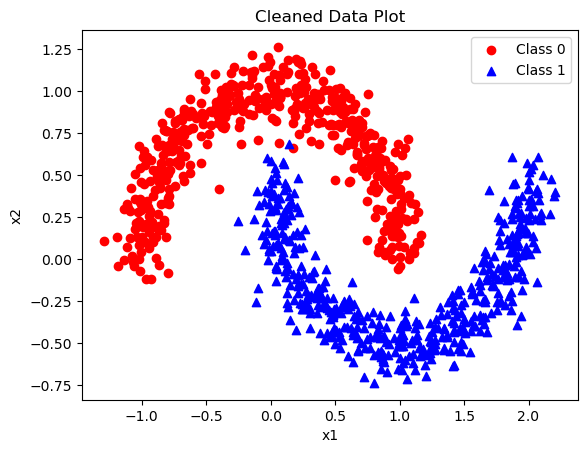